Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/skin_cancer/Train/')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/skin_cancer/Test/')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize thae data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

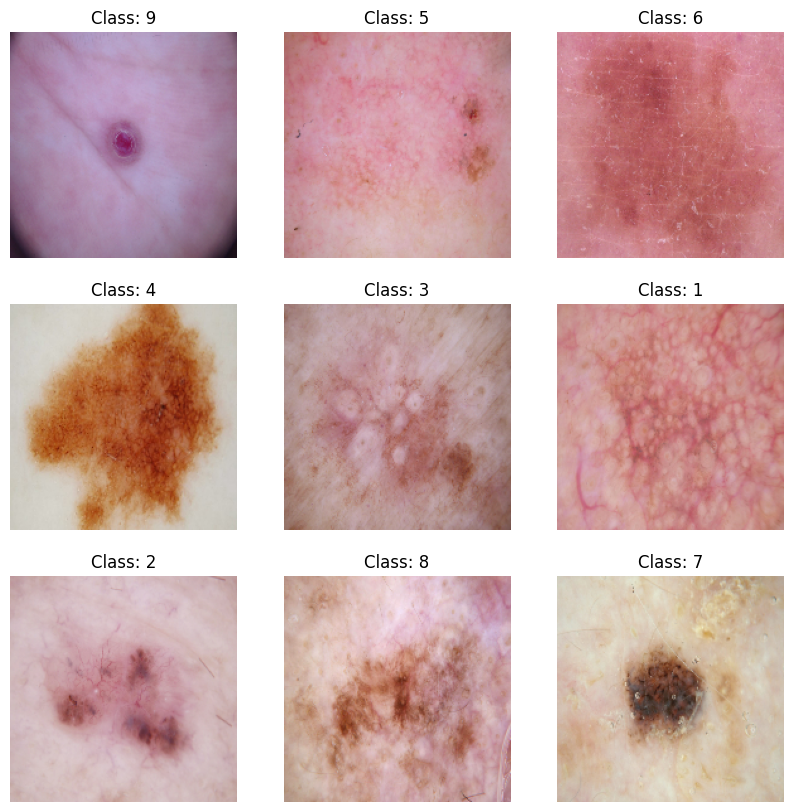

In [ ]:
import matplotlib.pyplot as plt

samples_per_class = {}

for images, labels in train_ds:
    for i in range(len(images)):
        label = tf.argmax(labels[i]).numpy()

        if label not in samples_per_class:
            samples_per_class[label] = images[i]

        if len(samples_per_class) == 9:
            break
    else:
        continue
    break

fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # Adjust as needed

for i, (label, image) in enumerate(samples_per_class.items()):
    ax = axs[i // 3, i % 3]
    ax.imshow(image / 255.)  # Scale the image values between 0 and 1
    ax.set_title(f'Class: {label+1}')
    ax.axis('off')

plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
inputs = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Rescaling(1./255) (inputs)

x = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Flatten() (x)
x = tf.keras.layers.Dense(512, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)

outputs = tf.keras.layers.Dense(9, activation = 'softmax') (x)

model = tf.keras.Model(inputs, outputs)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# View the summary of all layers
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89, 89, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,131,785 (15.76 MB)

 Trainable params: 4,129,801 (15.75 MB)

 Non-trainable params: 1,984 (7.75 KB)

### Train the model

In [ ]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs,
    verbose = 2
)

Epoch 1/20
56/56 - 37s - 652ms/step - accuracy: 0.3315 - loss: 2.1087 - val_accuracy: 0.0872 - val_loss: 2.3347
Epoch 2/20
56/56 - 44s - 789ms/step - accuracy: 0.4191 - loss: 1.7282 - val_accuracy: 0.1499 - val_loss: 2.3047
Epoch 3/20
56/56 - 40s - 714ms/step - accuracy: 0.4905 - loss: 1.4962 - val_accuracy: 0.1834 - val_loss: 2.4906
Epoch 4/20
56/56 - 38s - 678ms/step - accuracy: 0.5112 - loss: 1.4241 - val_accuracy: 0.1544 - val_loss: 3.0184
Epoch 5/20
56/56 - 38s - 681ms/step - accuracy: 0.5100 - loss: 1.3536 - val_accuracy: 0.2416 - val_loss: 3.1027
Epoch 6/20
56/56 - 39s - 697ms/step - accuracy: 0.5251 - loss: 1.3420 - val_accuracy: 0.3356 - val_loss: 2.0068
Epoch 7/20
56/56 - 39s - 704ms/step - accuracy: 0.5513 - loss: 1.2633 - val_accuracy: 0.4049 - val_loss: 1.9841
Epoch 8/20
56/56 - 39s - 700ms/step - accuracy: 0.5742 - loss: 1.2118 - val_accuracy: 0.3960 - val_loss: 2.0763
Epoch 9/20
56/56 - 39s - 699ms/step - accuracy: 0.5820 - loss: 1.1729 - val_accuracy: 0.4340 - val_loss:

### Visualizing training results

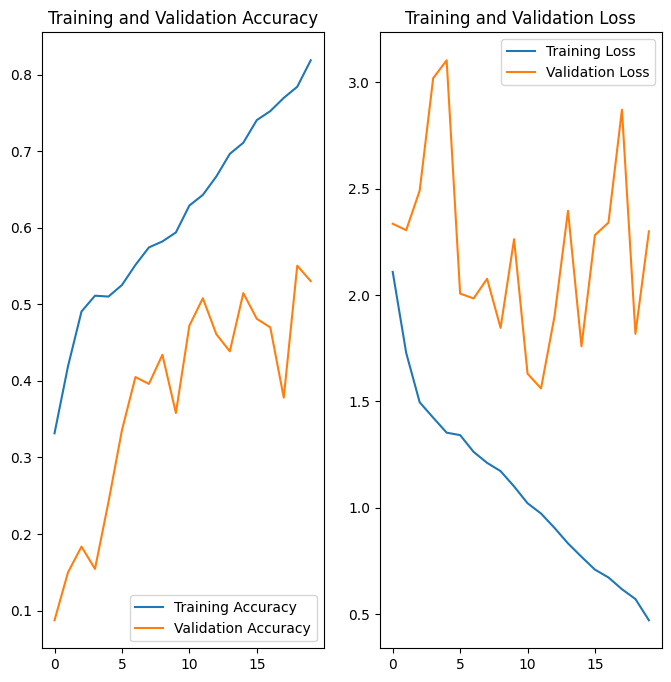

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model is overfitting. This is apparent by the validation curves being significantly divergent from the respective training curves. This phenomenon is likely because although the model does learn what the skin cancers look like, it fails to recognize similar examples in the validation set due to the model being fixated on the specific angles/position of the training images. This phenomenon can be eliminated or at least greatly reduced by introducing slight variations in the training images by flipping some of the images at random, rotating some images, etc.

To address this issue, we shall try augmenting the images with flipped, rotated and zoomed versions.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomZoom(0.2, 0.2)

])

2024-05-08 22:40:38.591012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


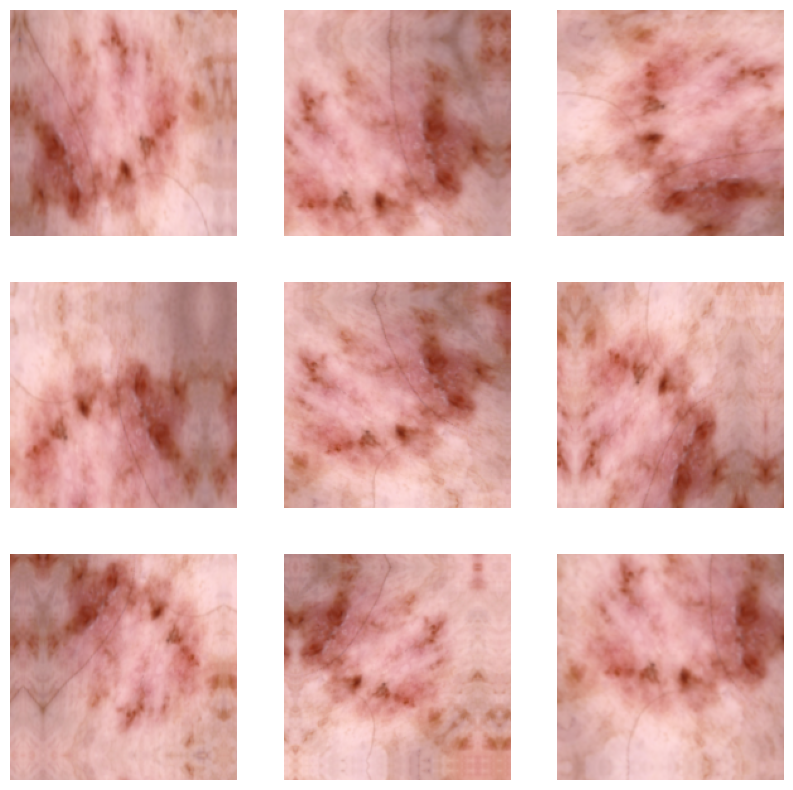

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
for images, labels in train_ds.take(1):

    image = images[0].numpy().astype("uint8")
    plt.figure(figsize=(10, 10))
    for i in range(9):
        aug_img = tf.keras.layers.RandomFlip("horizontal_and_vertical") (image)
        aug_img = tf.keras.layers.RandomRotation(0.2) (aug_img)
        aug_img = tf.keras.layers.RandomTranslation(0.2, 0.2) (aug_img)
        aug_img = tf.keras.layers.RandomZoom(0.2, 0.2) (aug_img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(aug_img / 255.)
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

inputs = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Rescaling(1./255) (inputs)

x = tf.keras.layers.RandomFlip("horizontal_and_vertical") (x)
x = tf.keras.layers.RandomRotation(0.2) (x)
x = tf.keras.layers.RandomTranslation(0.2, 0.2) (x)
x = tf.keras.layers.RandomZoom(0.2, 0.2) (x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Flatten() (x)
x = tf.keras.layers.Dense(512, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)

outputs = tf.keras.layers.Dense(9, activation = 'softmax') (x)

model = tf.keras.Model(inputs, outputs)

### Compiling the model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

### Training the model

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_10 (RandomFlip)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_11              │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_10           │ (None, 180, 180, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_10 (RandomZoom)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 89, 89, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,131,785 (15.76 MB)

 Trainable params: 4,129,801 (15.75 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs,
    verbose = 2
)

Epoch 1/20
56/56 - 44s - 777ms/step - accuracy: 0.3421 - loss: 2.0981 - val_accuracy: 0.1499 - val_loss: 2.3347
Epoch 2/20
56/56 - 43s - 759ms/step - accuracy: 0.4107 - loss: 1.7558 - val_accuracy: 0.1499 - val_loss: 2.3983
Epoch 3/20
56/56 - 40s - 715ms/step - accuracy: 0.4297 - loss: 1.6313 - val_accuracy: 0.2237 - val_loss: 2.4378
Epoch 4/20
56/56 - 40s - 706ms/step - accuracy: 0.4375 - loss: 1.6034 - val_accuracy: 0.1566 - val_loss: 2.5764
Epoch 5/20
56/56 - 39s - 693ms/step - accuracy: 0.4414 - loss: 1.5540 - val_accuracy: 0.2483 - val_loss: 2.3364
Epoch 6/20
56/56 - 38s - 677ms/step - accuracy: 0.4615 - loss: 1.5428 - val_accuracy: 0.2998 - val_loss: 2.1363
Epoch 7/20
56/56 - 36s - 648ms/step - accuracy: 0.4621 - loss: 1.5011 - val_accuracy: 0.3758 - val_loss: 1.8280
Epoch 8/20
56/56 - 36s - 647ms/step - accuracy: 0.4760 - loss: 1.4907 - val_accuracy: 0.3915 - val_loss: 1.6926
Epoch 9/20
56/56 - 37s - 653ms/step - accuracy: 0.4704 - loss: 1.4585 - val_accuracy: 0.4609 - val_loss:

### Visualizing the results

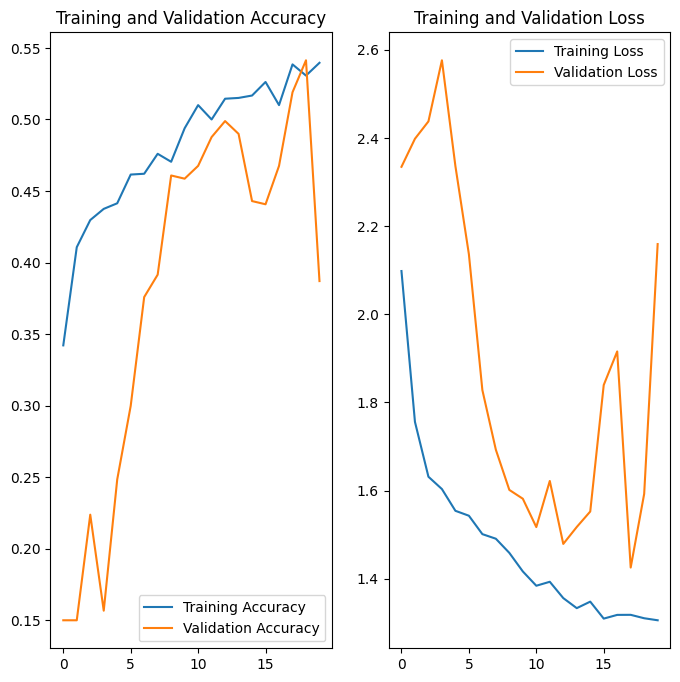

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model now underfits the data. However, the validation accuracy (loss) curve appears more convergent with the training accuracy (loss) curve this time, although it does fluctuate quite a bit. This suggests two things. One, we need more training epochs. With sufficient number of epochs, it is highly likely that the validation curves will eventually converge consistently with the training curves. Second, we need more training data in order to increase the training and validation accuracy asymptotes.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
class_counts = {class_name: 0 for class_name in class_names}

label_batches = [labels for _, labels in train_ds]
for batch in label_batches:
    for label in batch:
        class_counts[class_names[np.argmax(label) - 1]] += 1

for label, count in class_counts.items():
    print(f'{label}: {count} samples')

2024-05-08 22:53:20.701222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


actinic keratosis: 309 samples
basal cell carcinoma: 77 samples
dermatofibroma: 352 samples
melanoma: 277 samples
nevus: 370 samples
pigmented benign keratosis: 58 samples
seborrheic keratosis: 142 samples
squamous cell carcinoma: 115 samples
vascular lesion: 92 samples


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
`pigmented benign keratosis` has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
`dermatofibroma` dominates the other classes in terms of proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [3]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [11]:
path_to_training_dataset = '/content/gdrive/MyDrive/skin_cancer/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A132402F2E0>: 100%|██████████| 500/500 [00:04<00:00, 115.40 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A128475E8F0>: 100%|██████████| 500/500 [00:04<00:00, 116.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A12847C9750>: 100%|██████████| 500/500 [00:03<00:00, 125.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A13240EFC10>: 100%|██████████| 500/500 [00:06<00:00, 78.92 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7A13240538B0>: 100%|██████████| 500/500 [00:11<00:00, 42.27 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A12846AAA70>: 100%|██████████| 500/500 [00:04<00:00, 103.59 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A13240EE350>: 100%|██████████| 500/500 [00:05<00:00, 90.46 Samples/s] 


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A1284623160>: 100%|██████████| 500/500 [00:06<00:00, 76.18 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A128470B640>: 100%|██████████| 500/500 [00:08<00:00, 60.61 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [12]:
import shutil

for label in os.listdir(data_dir_train)[1:]:
    parent = f'{data_dir_train}/{label}'
    sub = parent + '/output'
    # print(len(os.listdir(sub)))
    for item in os.listdir(sub):
        shutil.move(sub + '/' + item, parent + '/' + item)
    shutil.rmtree(sub)

### Lets see the distribution of augmented data after adding new images to the original training data.

In [13]:
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical'
)

class_counts = {class_name: 0 for class_name in class_names}

label_batches = [labels for _, labels in train_ds_aug]
for batch in label_batches:
    for label in batch:
        class_counts[class_names[np.argmax(label) - 1]] += 1

for label, count in class_counts.items():
    print(f'{label}: {count} samples')

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
actinic keratosis: 721 samples
basal cell carcinoma: 455 samples
dermatofibroma: 755 samples
melanoma: 677 samples
nevus: 773 samples
pigmented benign keratosis: 456 samples
seborrheic keratosis: 569 samples
squamous cell carcinoma: 493 samples
vascular lesion: 493 samples


In [14]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_height, img_width),
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical'
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo**: Train the model on the data created using Augmentor

In [15]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create your model (make sure to include normalization)

In [16]:
## your code goes here

inputs = tf.keras.layers.Input(shape = (180, 180, 3))
x = tf.keras.layers.Rescaling(1./255) (inputs)

x = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu') (x)
x = tf.keras.layers.MaxPool2D(2, 2) (x)
x = tf.keras.layers.BatchNormalization() (x)

x = tf.keras.layers.Flatten() (x)
x = tf.keras.layers.Dense(512, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)
x = tf.keras.layers.Dense(256, activation = 'relu') (x)
x = tf.keras.layers.Dropout(0.1) (x)

outputs = tf.keras.layers.Dense(9, activation = 'softmax') (x)

model = tf.keras.Model(inputs, outputs)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [17]:
## your code goes here

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 89, 89, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496 

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds_aug,
    validation_data = val_ds_aug,
    epochs = epochs,
    verbose = 2
)

Epoch 1/50
169/169 - 57s - loss: 1.8975 - accuracy: 0.3398 - val_loss: 2.2624 - val_accuracy: 0.1396 - 57s/epoch - 336ms/step
Epoch 2/50


#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

